In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# matplotlib 한글 출력..

import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [3]:
# 경고창 삭제
import warnings
warnings.filterwarnings('ignore')

In [166]:
# 머지완료한 파일 불러오기
pop_merge = pd.read_csv('./data/pop_merge.csv', thousands = ',')
pop_merge.head()

,행정구역,2010년01월_계_연령구간인구수,2010년02월_계_연령구간인구수,2010년03월_계_연령구간인구수,2010년04월_계_연령구간인구수,2010년05월_계_연령구간인구수,2010년06월_계_연령구간인구수,2010년07월_계_연령구간인구수,2010년08월_계_연령구간인구수,2010년09월_계_연령구간인구수,...,2019년03월_계_연령구간인구수,2019년04월_계_연령구간인구수,2019년05월_계_연령구간인구수,2019년06월_계_연령구간인구수,2019년07월_계_연령구간인구수,2019년08월_계_연령구간인구수,2019년09월_계_연령구간인구수,2019년10월_계_연령구간인구수,2019년11월_계_연령구간인구수,2019년12월_계_연령구간인구수
0,서울특별시 (1100000000),509764.0,508535.0,506755.0,505627.0,504480.0,503991.0,503200.0,502690.0,502054.0,...,386601.0,384909.0,383271.0,381399.0,379415.0,376635.0,374490.0,372892.0,371110.0,369938.0
1,서울특별시 종로구 (1111000000),6420.0,6416.0,6372.0,6388.0,6348.0,6354.0,6311.0,6285.0,6259.0,...,4635.0,4618.0,4589.0,4544.0,4534.0,4524.0,4502.0,4469.0,4442.0,4417.0
2,서울특별시 종로구 청운효자동(1111051500),710.0,709.0,699.0,691.0,684.0,680.0,678.0,667.0,656.0,...,499.0,497.0,492.0,483.0,493.0,493.0,491.0,486.0,487.0,481.0
3,서울특별시 종로구 사직동(1111053000),446.0,436.0,437.0,442.0,443.0,455.0,452.0,453.0,452.0,...,354.0,349.0,346.0,340.0,336.0,338.0,337.0,336.0,337.0,343.0
4,서울특별시 종로구 삼청동(1111054000),132.0,128.0,127.0,127.0,125.0,127.0,125.0,123.0,120.0,...,70.0,69.0,67.0,67.0,63.0,61.0,62.0,61.0,57.0,57.0


In [167]:
# nan값 확인 후 nan값을 0으로 대체
# nan값이 2010년에는 있고, 2019년에는 없음 => 아마 새로생긴 행정구역이 아닐까?
pop_merge.isnull()
pop_merge.fillna(0, inplace=True)
pop_merge.head()

,행정구역,2010년01월_계_연령구간인구수,2010년02월_계_연령구간인구수,2010년03월_계_연령구간인구수,2010년04월_계_연령구간인구수,2010년05월_계_연령구간인구수,2010년06월_계_연령구간인구수,2010년07월_계_연령구간인구수,2010년08월_계_연령구간인구수,2010년09월_계_연령구간인구수,...,2019년03월_계_연령구간인구수,2019년04월_계_연령구간인구수,2019년05월_계_연령구간인구수,2019년06월_계_연령구간인구수,2019년07월_계_연령구간인구수,2019년08월_계_연령구간인구수,2019년09월_계_연령구간인구수,2019년10월_계_연령구간인구수,2019년11월_계_연령구간인구수,2019년12월_계_연령구간인구수
0,서울특별시 (1100000000),509764.0,508535.0,506755.0,505627.0,504480.0,503991.0,503200.0,502690.0,502054.0,...,386601.0,384909.0,383271.0,381399.0,379415.0,376635.0,374490.0,372892.0,371110.0,369938.0
1,서울특별시 종로구 (1111000000),6420.0,6416.0,6372.0,6388.0,6348.0,6354.0,6311.0,6285.0,6259.0,...,4635.0,4618.0,4589.0,4544.0,4534.0,4524.0,4502.0,4469.0,4442.0,4417.0
2,서울특별시 종로구 청운효자동(1111051500),710.0,709.0,699.0,691.0,684.0,680.0,678.0,667.0,656.0,...,499.0,497.0,492.0,483.0,493.0,493.0,491.0,486.0,487.0,481.0
3,서울특별시 종로구 사직동(1111053000),446.0,436.0,437.0,442.0,443.0,455.0,452.0,453.0,452.0,...,354.0,349.0,346.0,340.0,336.0,338.0,337.0,336.0,337.0,343.0
4,서울특별시 종로구 삼청동(1111054000),132.0,128.0,127.0,127.0,125.0,127.0,125.0,123.0,120.0,...,70.0,69.0,67.0,67.0,63.0,61.0,62.0,61.0,57.0,57.0


In [168]:
# 바꿔줄 칼럼명 생성
cols = []
for y in range(2010,2020):
    for m in range(1,13):
        if m >= 10:
            cols.append(f'{y}-{m}')
        else:
            cols.append(f'{y}-0{m}')

cols

['2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '20

In [169]:
# 수정안할 칼럼과 병합
fcol = pop_merge.columns[:1].values.tolist()
fcol.extend(cols)
# 전체칼럼 수정
pop_merge.columns = fcol
pop_merge.head(2)

,행정구역,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,서울특별시 (1100000000),509764.0,508535.0,506755.0,505627.0,504480.0,503991.0,503200.0,502690.0,502054.0,...,386601.0,384909.0,383271.0,381399.0,379415.0,376635.0,374490.0,372892.0,371110.0,369938.0
1,서울특별시 종로구 (1111000000),6420.0,6416.0,6372.0,6388.0,6348.0,6354.0,6311.0,6285.0,6259.0,...,4635.0,4618.0,4589.0,4544.0,4534.0,4524.0,4502.0,4469.0,4442.0,4417.0


In [170]:
# 서울특별시 로우삭제
pop_merge = pop_merge.drop([pop_merge.index[0]])
pop_merge.head(2)

,행정구역,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
1,서울특별시 종로구 (1111000000),6420.0,6416.0,6372.0,6388.0,6348.0,6354.0,6311.0,6285.0,6259.0,...,4635.0,4618.0,4589.0,4544.0,4534.0,4524.0,4502.0,4469.0,4442.0,4417.0
2,서울특별시 종로구 청운효자동(1111051500),710.0,709.0,699.0,691.0,684.0,680.0,678.0,667.0,656.0,...,499.0,497.0,492.0,483.0,493.0,493.0,491.0,486.0,487.0,481.0


In [171]:
#인덱스설정 및 전치행렬
pop_merge = pop_merge.set_index('행정구역')
pop_merge = pop_merge.T
pop_merge.head()

행정구역,서울특별시 종로구 (1111000000),서울특별시 종로구 청운효자동(1111051500),서울특별시 종로구 사직동(1111053000),서울특별시 종로구 삼청동(1111054000),서울특별시 종로구 부암동(1111055000),서울특별시 종로구 평창동(1111056000),서울특별시 종로구 무악동(1111057000),서울특별시 종로구 교남동(1111058000),서울특별시 종로구 가회동(1111060000),서울특별시 종로구 종로1.2.3.4가동(1111061500),...,경기도 부천시 대산동(4119074600),경기도 부천시 범안동(4119079500),경기도 화성시 동탄7동(4159061000),충청북도 진천군 덕산읍(4375025300),경기도 평택시 용이동(4122063500),경기도 김포시 마산동(4157057500),경기도 남양주시 퇴계원읍(4136026500),경기도 화성시 동탄8동(4159062000),전라북도 전주시 덕진구 여의동(4511366500),인천광역시 서구 마전동(2826073000)
2010-01,6420.0,710.0,446.0,132.0,334.0,724.0,442.0,371.0,202.0,187.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-02,6416.0,709.0,436.0,128.0,331.0,734.0,450.0,375.0,202.0,181.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03,6372.0,699.0,437.0,127.0,333.0,722.0,449.0,379.0,197.0,171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-04,6388.0,691.0,442.0,127.0,340.0,722.0,444.0,384.0,198.0,172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-05,6348.0,684.0,443.0,125.0,340.0,727.0,447.0,378.0,194.0,170.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
# 날짜 추가
# pop_merge['date'] = pop_merge.index
# pop_merge['date'] = pop_merge['date'].astype(date)
# pop_merge.head(3)

In [172]:
# 서울지역, 자치구만 남기고 drop

for new in pop_merge.columns:
    if new.split(' ')[0] != '서울특별시':
        pop_merge.drop(f'{new}',1, inplace=True)
pop_merge.head()

행정구역,서울특별시 종로구 (1111000000),서울특별시 종로구 청운효자동(1111051500),서울특별시 종로구 사직동(1111053000),서울특별시 종로구 삼청동(1111054000),서울특별시 종로구 부암동(1111055000),서울특별시 종로구 평창동(1111056000),서울특별시 종로구 무악동(1111057000),서울특별시 종로구 교남동(1111058000),서울특별시 종로구 가회동(1111060000),서울특별시 종로구 종로1.2.3.4가동(1111061500),...,서울특별시 중구 약수동(1114063500),서울특별시 중구 청구동(1114064500),서울특별시 중구 동화동(1114066500),서울특별시 송파구 위례동(1171064700),서울특별시 강북구 번1동(1130559500),서울특별시 강북구 번2동(1130560300),서울특별시 강북구 번3동(1130560800),서울특별시 강북구 수유1동(1130561500),서울특별시 강북구 수유2동(1130562500),서울특별시 강북구 수유3동(1130563500)
2010-01,6420.0,710.0,446.0,132.0,334.0,724.0,442.0,371.0,202.0,187.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-02,6416.0,709.0,436.0,128.0,331.0,734.0,450.0,375.0,202.0,181.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03,6372.0,699.0,437.0,127.0,333.0,722.0,449.0,379.0,197.0,171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-04,6388.0,691.0,442.0,127.0,340.0,722.0,444.0,384.0,198.0,172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-05,6348.0,684.0,443.0,125.0,340.0,727.0,447.0,378.0,194.0,170.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
for new in pop_merge.columns:
    if len(new.split(' ')[2]) != 12:
        pop_merge.drop(f'{new}',1, inplace=True)
pop_merge.head()

행정구역,서울특별시 종로구 (1111000000),서울특별시 중구 (1114000000),서울특별시 용산구 (1117000000),서울특별시 성동구 (1120000000),서울특별시 광진구 (1121500000),서울특별시 동대문구 (1123000000),서울특별시 중랑구 (1126000000),서울특별시 성북구 (1129000000),서울특별시 강북구 (1130500000),서울특별시 도봉구 (1132000000),...,서울특별시 강서구 (1150000000),서울특별시 구로구 (1153000000),서울특별시 금천구 (1154500000),서울특별시 영등포구 (1156000000),서울특별시 동작구 (1159000000),서울특별시 관악구 (1162000000),서울특별시 서초구 (1165000000),서울특별시 강남구 (1168000000),서울특별시 송파구 (1171000000),서울특별시 강동구 (1174000000)
2010-01,6420.0,5725.0,11797.0,16416.0,17564.0,16889.0,19965.0,25735.0,15480.0,17426.0,...,32152.0,24889.0,11604.0,22597.0,20383.0,25387.0,21112.0,23460.0,35186.0,24642.0
2010-02,6416.0,5721.0,11732.0,16328.0,17518.0,16796.0,20036.0,25625.0,15407.0,17338.0,...,31992.0,24800.0,11529.0,22534.0,20352.0,25233.0,21125.0,23531.0,35195.0,24714.0
2010-03,6372.0,5702.0,11677.0,16267.0,17436.0,16819.0,20038.0,25565.0,15320.0,17248.0,...,31816.0,24687.0,11441.0,22351.0,20205.0,25137.0,21135.0,23511.0,35136.0,24698.0
2010-04,6388.0,5680.0,11584.0,16264.0,17334.0,16865.0,19916.0,25423.0,15273.0,17164.0,...,31711.0,24625.0,11379.0,22281.0,20173.0,25035.0,21224.0,23593.0,35146.0,24750.0
2010-05,6348.0,5683.0,11532.0,16182.0,17312.0,16820.0,19779.0,25425.0,15158.0,17085.0,...,31573.0,24624.0,11341.0,22219.0,20140.0,24945.0,21306.0,23557.0,35147.0,24762.0


In [174]:
pop_gu = pop_merge.T
pop_gu.head(5)

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 종로구 (1111000000),6420.0,6416.0,6372.0,6388.0,6348.0,6354.0,6311.0,6285.0,6259.0,6236.0,...,4635.0,4618.0,4589.0,4544.0,4534.0,4524.0,4502.0,4469.0,4442.0,4417.0
서울특별시 중구 (1114000000),5725.0,5721.0,5702.0,5680.0,5683.0,5644.0,5628.0,5628.0,5636.0,5661.0,...,4637.0,4610.0,4597.0,4587.0,4587.0,4559.0,4539.0,4504.0,4501.0,4459.0
서울특별시 용산구 (1117000000),11797.0,11732.0,11677.0,11584.0,11532.0,11555.0,11555.0,11617.0,11630.0,11643.0,...,8496.0,8438.0,8436.0,8424.0,8404.0,8369.0,8300.0,8278.0,8251.0,8256.0
서울특별시 성동구 (1120000000),16416.0,16328.0,16267.0,16264.0,16182.0,16134.0,16031.0,15989.0,15857.0,15771.0,...,14055.0,13960.0,13924.0,13865.0,13803.0,13723.0,13681.0,13613.0,13551.0,13498.0
서울특별시 광진구 (1121500000),17564.0,17518.0,17436.0,17334.0,17312.0,17307.0,17233.0,17189.0,17119.0,17082.0,...,13099.0,12955.0,12803.0,12679.0,12570.0,12454.0,12369.0,12265.0,12180.0,12108.0


In [175]:
# 자치구 인덱스설정
gu = []
for i in pop_gu.index:
    gu.append(i.split(' ')[1])
    
pop_gu['gu'] = gu
pop_gu = pop_gu.set_index(['gu'])
pop_gu.head()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
gu,,,,,,,,,,,,,,,,,,,,,
종로구,6420.0,6416.0,6372.0,6388.0,6348.0,6354.0,6311.0,6285.0,6259.0,6236.0,...,4635.0,4618.0,4589.0,4544.0,4534.0,4524.0,4502.0,4469.0,4442.0,4417.0
중구,5725.0,5721.0,5702.0,5680.0,5683.0,5644.0,5628.0,5628.0,5636.0,5661.0,...,4637.0,4610.0,4597.0,4587.0,4587.0,4559.0,4539.0,4504.0,4501.0,4459.0
용산구,11797.0,11732.0,11677.0,11584.0,11532.0,11555.0,11555.0,11617.0,11630.0,11643.0,...,8496.0,8438.0,8436.0,8424.0,8404.0,8369.0,8300.0,8278.0,8251.0,8256.0
성동구,16416.0,16328.0,16267.0,16264.0,16182.0,16134.0,16031.0,15989.0,15857.0,15771.0,...,14055.0,13960.0,13924.0,13865.0,13803.0,13723.0,13681.0,13613.0,13551.0,13498.0
광진구,17564.0,17518.0,17436.0,17334.0,17312.0,17307.0,17233.0,17189.0,17119.0,17082.0,...,13099.0,12955.0,12803.0,12679.0,12570.0,12454.0,12369.0,12265.0,12180.0,12108.0


In [169]:
# # 행정구역 세분화 및 칼럼추가
# si = []
# gu = []
# dong = []
# code = []

# for i in pop_merge.index:
#     si.append(i.split(' ')[0])
#     gu.append(i.split(' ')[1])
#     dong.append(i.split(' ')[2][:-12])
#     code.append(i.split(' ')[2][-11:-1])

# pop_merge['gu'] = gu
# pop_merge['dong'] = dong

# pop_merge

,2010-01-00,2010-02-00,2010-03-00,2010-04-00,2010-05-00,2010-06-00,2010-07-00,2010-08-00,2010-09-00,2010-10-00,...,2019-05-00,2019-06-00,2019-07-00,2019-08-00,2019-09-00,2019-10-00,2019-11-00,2019-12-00,gu,dong
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 종로구 청운효자동(1111051500),710.0,709.0,699.0,691.0,684.0,680.0,678.0,667.0,656.0,676.0,...,492.0,483.0,493.0,493.0,491.0,486.0,487.0,481.0,종로구,청운효자동
서울특별시 종로구 사직동(1111053000),446.0,436.0,437.0,442.0,443.0,455.0,452.0,453.0,452.0,446.0,...,346.0,340.0,336.0,338.0,337.0,336.0,337.0,343.0,종로구,사직동
서울특별시 종로구 삼청동(1111054000),132.0,128.0,127.0,127.0,125.0,127.0,125.0,123.0,120.0,124.0,...,67.0,67.0,63.0,61.0,62.0,61.0,57.0,57.0,종로구,삼청동
서울특별시 종로구 부암동(1111055000),334.0,331.0,333.0,340.0,340.0,344.0,340.0,342.0,340.0,336.0,...,286.0,285.0,282.0,281.0,280.0,280.0,287.0,294.0,종로구,부암동
서울특별시 종로구 평창동(1111056000),724.0,734.0,722.0,722.0,727.0,727.0,713.0,705.0,703.0,691.0,...,678.0,677.0,673.0,672.0,676.0,672.0,655.0,654.0,종로구,평창동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
서울특별시 강북구 번2동(1130560300),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,485.0,488.0,489.0,478.0,474.0,471.0,458.0,434.0,강북구,번2동
서울특별시 강북구 번3동(1130560800),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,599.0,594.0,583.0,583.0,577.0,577.0,584.0,579.0,강북구,번3동
서울특별시 강북구 수유1동(1130561500),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,662.0,659.0,660.0,657.0,662.0,663.0,654.0,647.0,강북구,수유1동


# 표로 살펴봅시다아아아

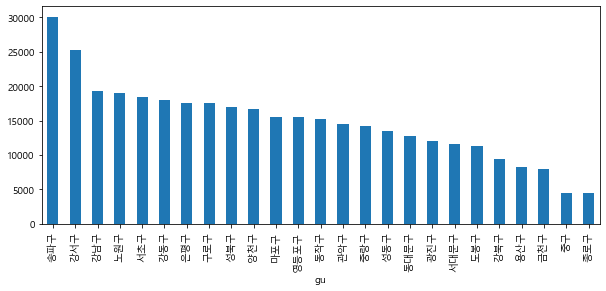

In [176]:
# 201912 기준 동별 아동수 bar chart
plt.figure(figsize=(10,4))
pop_gu['2019-12'].sort_values(ascending=False).plot(kind='bar')

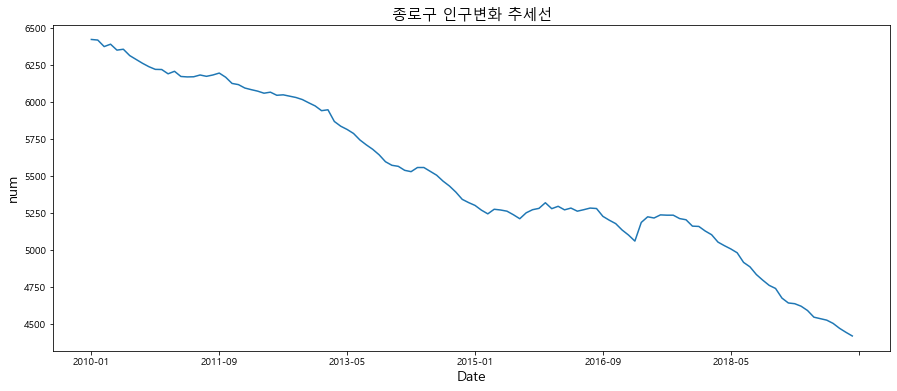

In [190]:
# 종로구 인구변화 추세선
plt.figure(figsize=(15,6))
plt.title('종로구 인구변화 추세선', fontsize=15) 
plt.ylabel('num', fontsize=14)
plt.xlabel('Date', fontsize=14)
population['종로구'].plot()

In [157]:
# 날짜타입 생성
# population = population.reset_index()
# population['index'] = pd.to_datetime(population['index'].astype(str), format='%Y-%m')
# population['index']

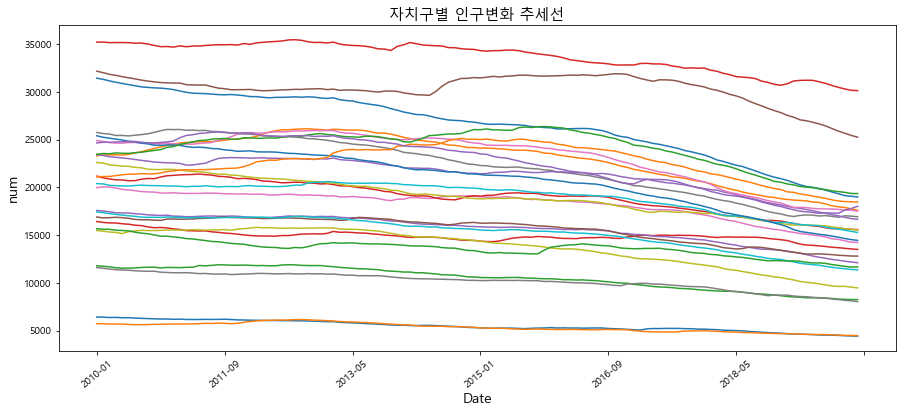

In [179]:
# 2010~2019 자치구별 line chart
plt.figure(figsize=(15,6))
plt.title('자치구별 인구변화 추세선', fontsize=15) 
plt.ylabel('num', fontsize=14)
plt.xlabel('Date', fontsize=14)

for gu in pop_gu.T.columns:
    population[f'{gu}'].plot()
    plt.xticks(rotation=40)

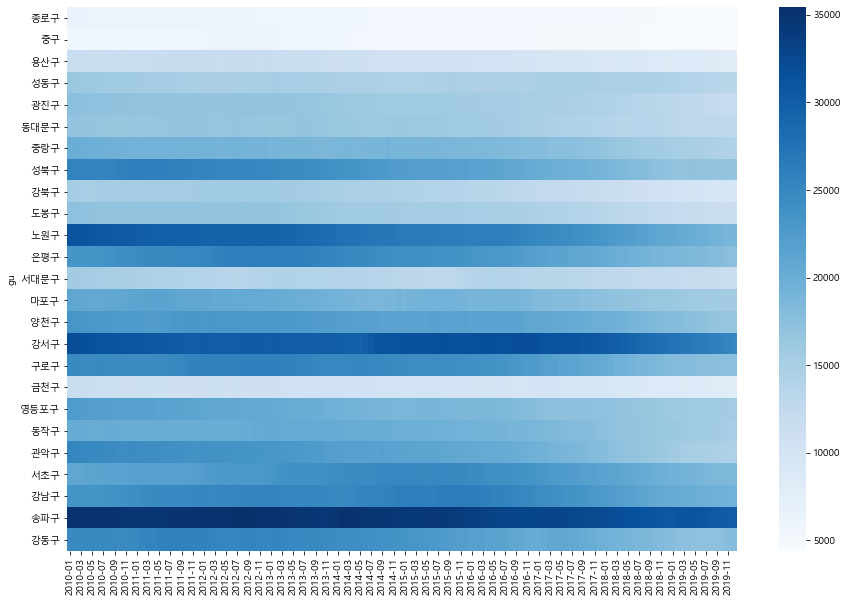

In [180]:
# 2010~2019 구별 변화추세 Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(pop_gu,cmap='Blues')

In [182]:
# 파일저장하기 
pop_gu.to_csv('./data/pop_gu.csv')
population.to_csv('./data/pop_day.csv')

# 시계열분석_ARIMA

In [191]:
# 회귀분석을 먼저 해볼꽈??
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [192]:
# 파일 불러오기
population = pd.read_csv('./data/pop_gu.csv', index_col=0)
population = population.T
population.head(3)

gu,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2010-01,6420.0,5725.0,11797.0,16416.0,17564.0,16889.0,19965.0,25735.0,15480.0,17426.0,...,32152.0,24889.0,11604.0,22597.0,20383.0,25387.0,21112.0,23460.0,35186.0,24642.0
2010-02,6416.0,5721.0,11732.0,16328.0,17518.0,16796.0,20036.0,25625.0,15407.0,17338.0,...,31992.0,24800.0,11529.0,22534.0,20352.0,25233.0,21125.0,23531.0,35195.0,24714.0
2010-03,6372.0,5702.0,11677.0,16267.0,17436.0,16819.0,20038.0,25565.0,15320.0,17248.0,...,31816.0,24687.0,11441.0,22351.0,20205.0,25137.0,21135.0,23511.0,35136.0,24698.0


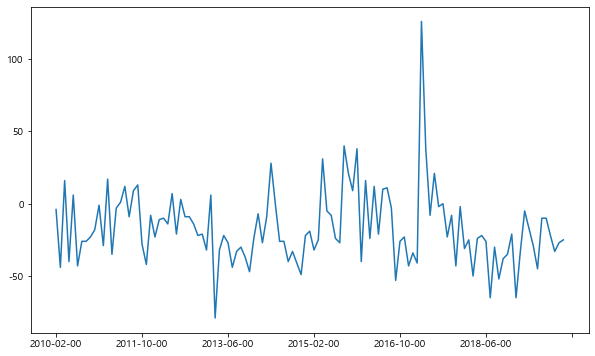

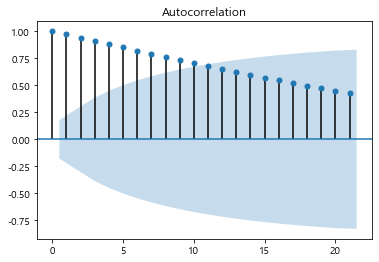

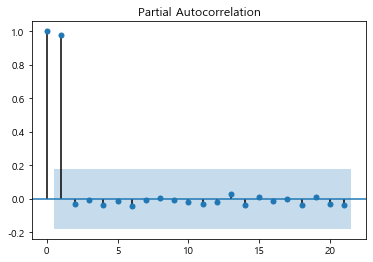

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10,6))
diff_1=population['종로구'].diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(population['종로구'])
plot_pacf(population['종로구'])
plt.show()

In [36]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(population['종로구'], order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.종로구   No. Observations:                  119
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -553.736
Method:                       css-mle   S.D. of innovations             25.387
Date:                Mon, 05 Oct 2020   AIC                           1113.471
Time:                        15:08:01   BIC                           1121.809
Sample:                             1   HQIC                          1116.857
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.8202      2.643     -6.364      0.000     -22.000     -11.640
ma.L1.D.종로구     0.1368      0.076      1.796      0.073      -0.013       0.286
                                    Roots       

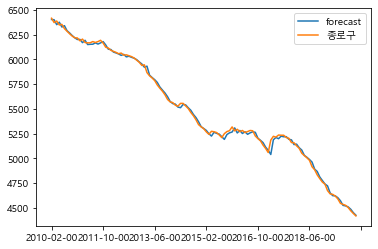

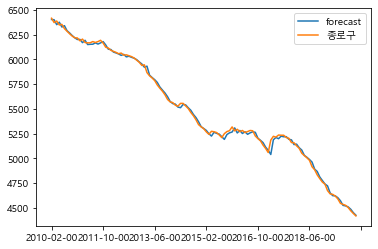

In [43]:
model_fit.plot_predict()

In [44]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([4399.21177245]), array([25.38661601]), array([[4349.45491939, 4448.96862552]]))


In [45]:
x = population.drop(['2019-12-00'], axis=1)
y = population['2019-12-00']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

KeyError: "['2019-12-00'] not found in axis"

In [62]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
predictions = log.predict(x_test)
predictions[:5]

array([11365.,  4417.,  8038.,  4459., 18455.])

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      4417.0       0.00      0.00      0.00       0.0
      4459.0       0.00      0.00      0.00       0.0
      8038.0       0.00      0.00      0.00       0.0
     11365.0       0.00      0.00      0.00       0.0
     12801.0       0.00      0.00      0.00       1.0
     14221.0       0.00      0.00      0.00       1.0
     15527.0       0.00      0.00      0.00       1.0
     18455.0       0.00      0.00      0.00       0.0
     18989.0       0.00      0.00      0.00       1.0
     19341.0       0.00      0.00      0.00       1.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0

